In [ ]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re
from collections import Counter

nltk.download('vader_lexicon')
url = 'http://bit.ly/park-reviews'
df_reviews = pd.read_csv(url)
df_reviews.head()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,review
0,If you've ever been to Disneyland anywhere you...
1,Its been a while since d last time we visit HK...
2,Thanks God it wasn t too hot or too humid wh...
3,HK Disneyland is a great compact park. Unfortu...
4,"the location is not in the city, took around 1..."


In [ ]:
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text.lower()

In [ ]:
# clean text
analyzer = SentimentIntensityAnalyzer()
df_reviews['clean_review'] = df_reviews['review'].apply(clean_text)

# Apply sentiment analysis
df_reviews['sentiment_score'] = df_reviews['clean_review'].apply(lambda review: analyzer.polarity_scores(review)['compound'])

# Categorize the reviews into positive, neutral, and negative
df_reviews['sentiment'] = df_reviews['sentiment_score'].apply(lambda score: 'negative' if score < -0.05 else 'positive' if score > 0.05 else 'neutral')

# Filter out the negative reviews
negative_reviews = df_reviews[df_reviews['sentiment'] == 'negative']['clean_review']

In [ ]:
df_reviews

,review,clean_review,sentiment_score,sentiment
0,If you've ever been to Disneyland anywhere you...,if youve ever been to disneyland anywhere youl...,0.6786,positive
1,Its been a while since d last time we visit HK...,its been a while since d last time we visit hk...,0.9882,positive
2,Thanks God it wasn t too hot or too humid wh...,thanks god it wasn t too hot or too humid wh...,0.9920,positive
3,HK Disneyland is a great compact park. Unfortu...,hk disneyland is a great compact park unfortun...,0.8489,positive
4,"the location is not in the city, took around 1...",the location is not in the city took around 1 ...,0.2846,positive
...,...,...,...,...
29021,I have taken my music groups to Disneyland for...,i have taken my music groups to disneyland for...,0.9087,positive
29022,This is definitely the Happiest Place on Earth...,this is definitely the happiest place on earth...,0.8225,positive
29023,"never again...what a horrible experience, the ...",never againwhat a horrible experience the wors...,-0.8847,negative
29024,We take a long weekend trip to California each...,we take a long weekend trip to california each...,0.7186,positive


In [ ]:
negative_reviews.head()

,clean_review
12,we spend two days the second day went early th...
25,disneylands the world over are generic apart f...
28,we visited here on a wednesday we arrived for ...
29,i need to say i have been to home of disney...
71,during a recent stop over in hong kong we paid...


In [ ]:
negative_df = df_reviews[df_reviews['sentiment'] == 'negative']

In [ ]:
# Download packages in the NLTK.
nltk.download(['stopwords',
               'wordnet',
               'averaged_perceptron_tagger',
               'universal_tagset',
               'tagsets'])

from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!
[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


In [ ]:
# Extract common words from negative reviews
all_words = ' '.join(negative_reviews).split()
word_count = Counter(all_words)

# Get the most common words, excluding stop words
common_complaints = [word for word, count in word_count.most_common(50) if word not in stopwords.words('english')]
common_complaints

['park',
 'disneyland',
 'disney',
 'rides',
 'day',
 'time',
 'get',
 'ride',
 'go',
 'one',
 'people']

In [ ]:
stop_words = set(stopwords.words("english"))
filtered_list = [word for word in all_words if word.casefold() not in stop_words]

In [ ]:
# Import the lemmatizer library.
from nltk.stem import WordNetLemmatizer

# Initialize the lemmatizer.
lemmatizer = WordNetLemmatizer()

# Create a new list to hold the lemmed words.
lemmed_words = []

# Lemmatize each word and store it in our lemmed_words variable.
for word in filtered_list:
  lemmed_words.append(lemmatizer.lemmatize(word))

# Print the first 8 lemmatized words.
print(lemmed_words[0:8])

['spend', 'two', 'day', 'second', 'day', 'went', 'early', 'went']


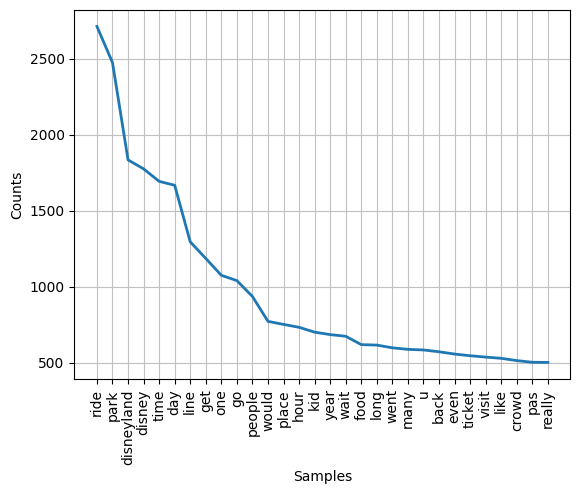

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
# Creating the word frequency distribution
freqdist = nltk.FreqDist(lemmed_words)

# Plotting the word frequency distribution
freqdist.plot(30)

In [ ]:
# Begin Aspect Based Sentiment Analysis
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

# Initialize Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# Define aspects
aspects = ['food', 'line', 'bathroom', 'parking', 'service', 'wait', 'parking', 'crowded', 'expensive', 'staff']

# Process reviews
aspect_sentiments = {aspect: [] for aspect in aspects}

# Change 'review_text' to 'review' to match the actual column name in df_reviews
for review in negative_df['clean_review']:
    for aspect in aspects:
        if aspect in review:
            sentiment = sia.polarity_scores(review)
            aspect_sentiments[aspect].append(sentiment['compound'])

# Average Sentiment Score for Each Aspect
aspect_averages = {}
for aspect in aspects:
    if aspect_sentiments[aspect]:
        avg_sentiment = sum(aspect_sentiments[aspect]) / len(aspect_sentiments[aspect])
        aspect_averages[aspect] = avg_sentiment
    else:
        aspect_averages[aspect] = None

print(aspect_averages)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


{'food': -0.558732196162047, 'line': -0.5978271515151516, 'bathroom': -0.7159027777777779, 'parking': -0.6391048543689316, 'service': -0.6640715231788078, 'wait': -0.5960032400589103, 'crowded': -0.5862857142857142, 'expensive': -0.5465303249097473, 'staff': -0.6488412186379925}


In [ ]:
# Convert aspect_averages dictionary to a DataFrame
aspect_averages_df = pd.DataFrame(list(aspect_averages.items()), columns=['Aspect', 'Average Sentiment'])

# Save the DataFrame to a CSV file
aspect_averages_df.to_csv('aspect_sentiment_averages.csv', index=False)

print("CSV file has been saved successfully.")

CSV file has been saved successfully.
